In [1]:
import pandas as pd 
import numpy as np
import heapq
import nltk
import matplotlib.pyplot as plt

from matplotlib import colors
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cross_validation import train_test_split
from sklearn import svm

In [2]:
df = pd.read_csv('../data/review.csv',nrows=1000)
# dfUser = pd.read_csv('../data/user.csv')
vectorizer = CountVectorizer()
# matrix is a n* 2000+ matrx, with each words represented by integer
matrix = vectorizer.fit_transform(df.text)

X = matrix
y = df.stars.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
keys = dfUser.user_id
values = dfUser.review_count
reviewCountDic = dict(zip(keys, values))
reviewCount = [reviewCountDic[id] for id in df.user_id]

In [3]:
'''
	adaboost for 1 and 5 star
''' 
df15 = df[((df.stars == 1)| (df.stars == 5))]
df15.index = range(len(df15))
vectorizer = CountVectorizer(stop_words='english')
# matrix is a n* 2000+ matrx, with each words represented by integer
matrix = vectorizer.fit_transform(df15.text)


X = matrix
y = df15.stars.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,learning_rate = 0.5)
bdt.fit(X_train, y_train)

z = bdt.predict(X_test)

In [14]:
type(X_test)

scipy.sparse.csr.csr_matrix

In [33]:
# df15

In [4]:
print 'adaboost15'
print 'error: {}'.format(sum(z!=y_test))
print 'total test: {}'.format(len(y_test))

# Y = bdt.feature_importances_
# Y = Y[Y!=0]
# N = len(Y)
# #index = [i for i, e in enumerate(Y) if e != 0]
# #print index
# X = range(N)
# plt.bar(X,Y)
# plt.show()

adaboost15
error: 17
total test: 123


In [5]:
vocab = vectorizer.vocabulary_ # vocab of all appeared words in corpus
importances = bdt.feature_importances_
index = range(len(importances))
count = np.array(matrix.sum(axis=0))[0]
length = np.array(X_test.sum(axis=1))
length = [item for sublist in length for item in sublist]

vocabNew = dict((value, key) for (key, value) in vocab.iteritems())

wordImptDict = {}
imptWordDict = {}
frequent = {}
#for value in index:
for ind,word in vocabNew.iteritems():
        wordImptDict[word] = importances[ind]
        frequent[word] = count[ind]

nMostImpt = 150

words = heapq.nlargest(nMostImpt, wordImptDict, key = wordImptDict.get)
words = [word.encode() for word in words] # array of important words
impt = [wordImptDict[word] for word in words  ] # array of importances 
cot = [frequent[word] for word in words] # array of counts of words
#print sum(cot)
#print sum(count)

<Container object of 150 artists>

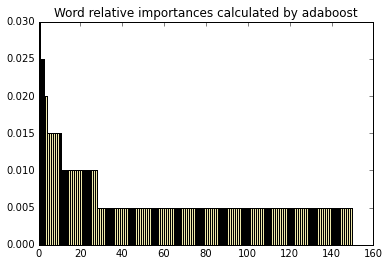

In [15]:
# bar plot of importances against words
%matplotlib inline
plt.figure()
plt.title("Word relative importances calculated by adaboost")
plt.bar(range(len(impt)), impt, color = "palegoldenrod")

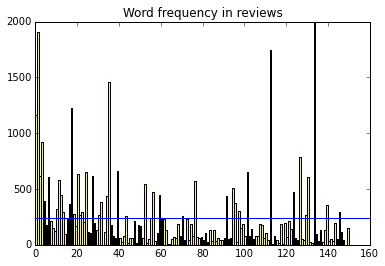

In [16]:
# plot bar plot of importances against words
%matplotlib inline
plt.figure()
plt.title("Word frequency in reviews")
plt.bar(range(len(cot)), cot,color = "palegoldenrod")
plt.plot([0, 160], [np.mean(cot), np.mean(cot)])

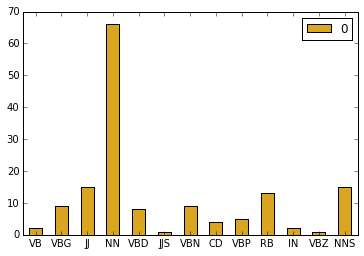

In [6]:
# plot part of speech allocation
%matplotlib inline
tagged = nltk.pos_tag(words)
tags = [t for (w,t) in tagged]
letter_counts = Counter(tags)
dfWords = pd.DataFrame.from_dict(letter_counts, orient='index')
dfWords.plot(kind="bar",rot=0,color = "goldenrod")

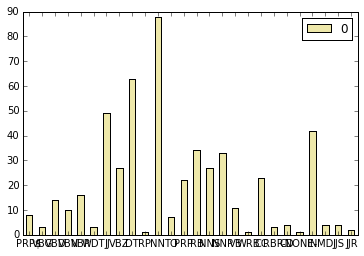

In [7]:
## Use the first 500 cause there's some unknown error in one entry between 500 and 1000
# plot part of speech allocation
tokenizer = RegexpTokenizer(r'\w+')
tex = [tokenizer.tokenize(sentence) for sentence in df.text[range(500)]]
tex = [item for sublist in tex for item in sublist]

%matplotlib inline
tagged = nltk.pos_tag(tex[0:500])
tags = [t for (w,t) in tagged]
letter_counts = Counter(tags)
dfWords = pd.DataFrame.from_dict(letter_counts, orient='index')
dfWords.plot(kind="bar",rot=0,color = "palegoldenrod")

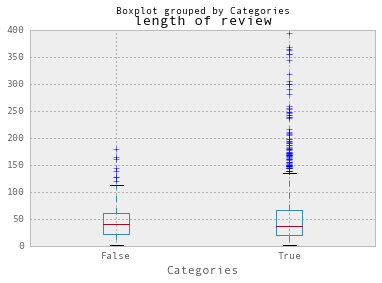

In [19]:
## Error analysis
# print length
%matplotlib inline
length = pd.DataFrame(length,columns = ['length of review'])
length['Categories'] = pd.Series(z==y_test)
pd.options.display.mpl_style = 'default'
length.boxplot(column = 'length of review', by='Categories')
#plt.show()

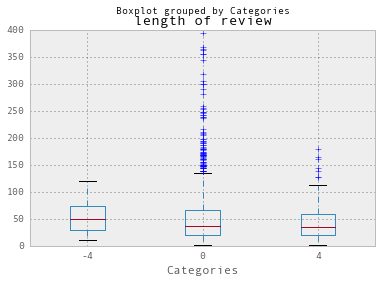

In [20]:
## Error analysis
%matplotlib inline
length = pd.DataFrame(length,columns = ['length of review'])
length['Categories'] = pd.Series(z-y_test)
pd.options.display.mpl_style = 'default'
length.boxplot(column = 'length of review', by='Categories')